In [1]:

# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#


In [2]:
# Set the background style of the plot
sns.set_style('darkgrid')

# Set the color palette for the plot

sns.set_palette('rainbow')


#Read the Dataset

In [3]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0



#preprocessing

In [9]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [14]:
for i in df.columns:
  print(i)

User ID
Gender
Age
EstimatedSalary
Purchased


In [15]:
#drop the column User ID
df.drop('User ID',axis=1,inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


#Visualizes

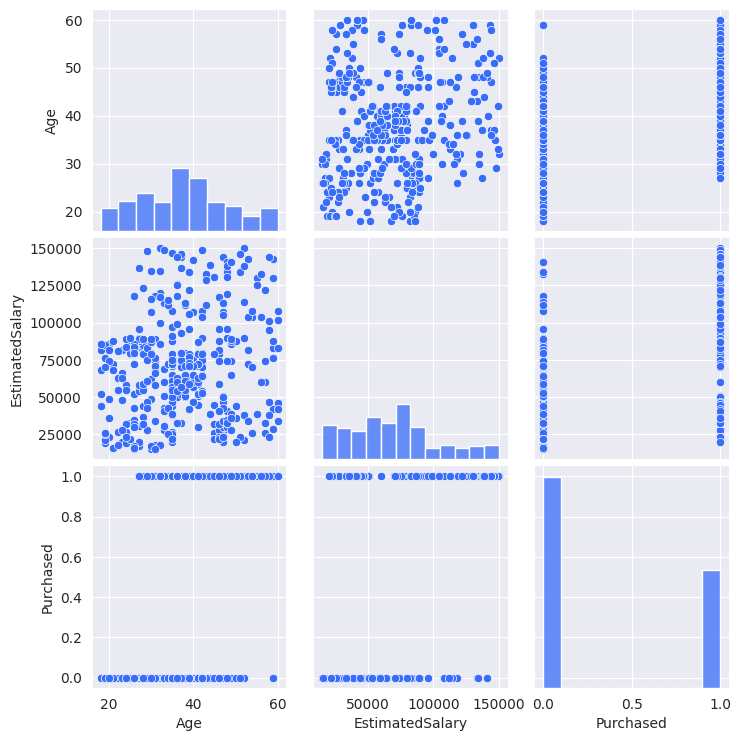

In [16]:
sns.pairplot(df)

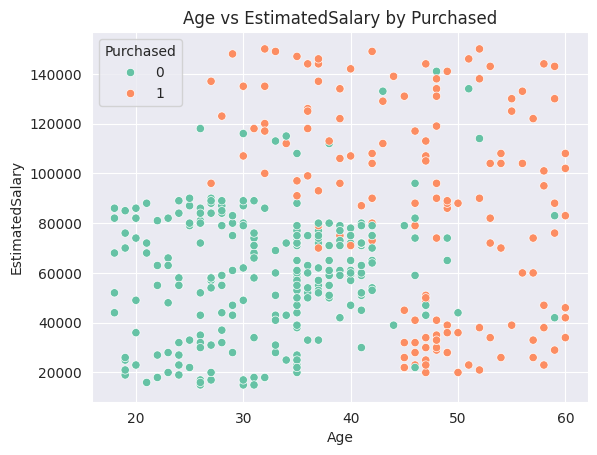

In [17]:
# Scatter plot of Age vs EstimatedSalary, colored by Purchased
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, palette='Set2')
plt.title('Age vs EstimatedSalary by Purchased')
plt.show()

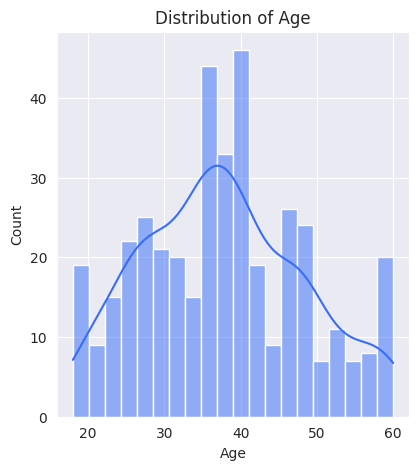

In [18]:
# Distribution of Age and EstimatedSalary using histograms
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

plt.show()


<Axes: xlabel='Purchased', ylabel='EstimatedSalary'>

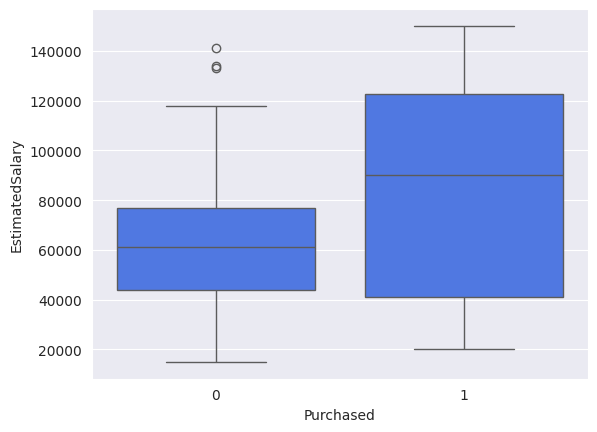

In [21]:
# Creates a box plot to visualize the distribution of 'EstimatedSalary' for each 'Purchased' category (0 and 1).
# This helps compare the median, quartiles, and potential outliers for the two groups.

sns.boxplot(y='EstimatedSalary',x="Purchased",data=df)

In [22]:
df[(df['EstimatedSalary']>120000) & (df['Purchased']==0)]


,Gender,Age,EstimatedSalary,Purchased
270,Female,43,133000,0
284,Male,48,141000,0
306,Female,51,134000,0


In [23]:
df.drop(df[(df['EstimatedSalary']>120000) & (df['Purchased']==0)].index,axis=0,inplace=True)
#

<Axes: xlabel='Purchased', ylabel='EstimatedSalary'>

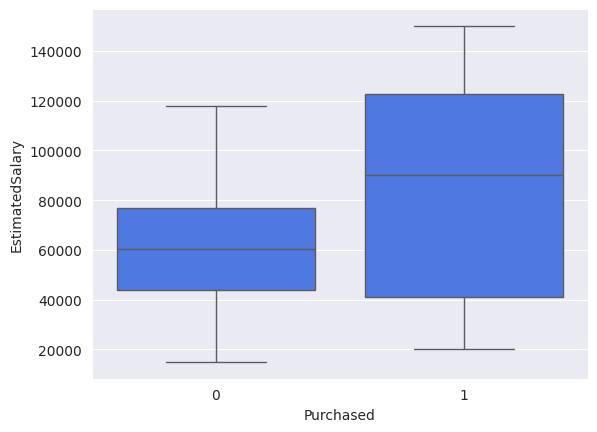

In [24]:
sns.boxplot(y='EstimatedSalary',x="Purchased",data=df)
#

<Axes: xlabel='Purchased', ylabel='count'>

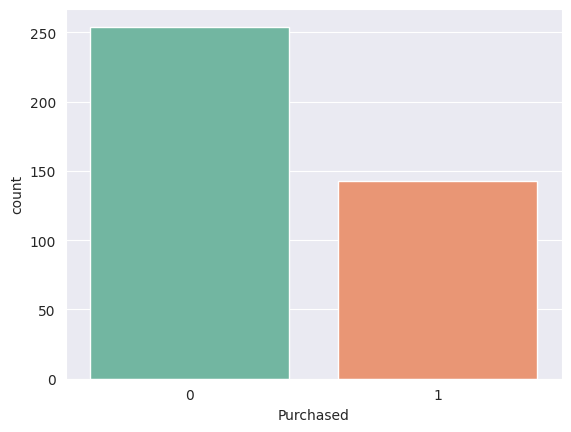

In [27]:
# Creates a count plot to visualize the frequency of each category (0 and 1) in the 'Purchased' column.
# This helps understand the class distribution of the target variable.
# The 'Set2' palette is used for color styling.
sns.countplot(x='Purchased',data=df,palette='Set2')

#Model  1

In [36]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [39]:
# Converts the categorical 'Gender' column into numerical representation using Label Encoding.
# This transforms labels like 'Male' and 'Female' into numerical values (e.g., 0 and 1).
df['Gender']=LabelEncoder().fit_transform(df['Gender'])
#


In [40]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [41]:
#train for model all fetures without target (purchesed)
x=df.drop('Purchased',axis=1)

y=df['Purchased']

In [42]:
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [43]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#

In [51]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape
#

((317, 3), (80, 3), (317,), (80,))

In [53]:
sc=StandardScaler()
x_train_scal=sc.fit_transform(x_train)
x_test_scla=sc.transform(x_test)

In [54]:
classifier=LogisticRegression()
classifier.fit(x_train_scal,y_train)

LogisticRegression()

In [59]:
y_pred=classifier.predict(x_test_scla)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [60]:
res=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
res

,Actual,Predicted
114,0,1
279,1,0
237,0,0
57,0,0
72,0,0
...,...,...
369,1,1
343,1,0
132,0,0
3,0,0


In [61]:
classifier.score(x_test_scla,y_test)
#

0.8125

In [62]:
classifier.score(x_train_scal,y_train)
#

0.8485804416403786

In [63]:
Z=np.linspace(1,5,100)
Z

array([1.        , 1.04040404, 1.08080808, 1.12121212, 1.16161616,
       1.2020202 , 1.24242424, 1.28282828, 1.32323232, 1.36363636,
       1.4040404 , 1.44444444, 1.48484848, 1.52525253, 1.56565657,
       1.60606061, 1.64646465, 1.68686869, 1.72727273, 1.76767677,
       1.80808081, 1.84848485, 1.88888889, 1.92929293, 1.96969697,
       2.01010101, 2.05050505, 2.09090909, 2.13131313, 2.17171717,
       2.21212121, 2.25252525, 2.29292929, 2.33333333, 2.37373737,
       2.41414141, 2.45454545, 2.49494949, 2.53535354, 2.57575758,
       2.61616162, 2.65656566, 2.6969697 , 2.73737374, 2.77777778,
       2.81818182, 2.85858586, 2.8989899 , 2.93939394, 2.97979798,
       3.02020202, 3.06060606, 3.1010101 , 3.14141414, 3.18181818,
       3.22222222, 3.26262626, 3.3030303 , 3.34343434, 3.38383838,
       3.42424242, 3.46464646, 3.50505051, 3.54545455, 3.58585859,
       3.62626263, 3.66666667, 3.70707071, 3.74747475, 3.78787879,
       3.82828283, 3.86868687, 3.90909091, 3.94949495, 3.98989

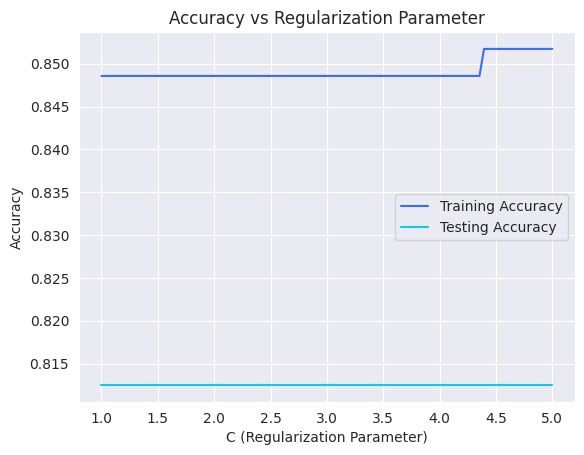

In [73]:
training_Accuracy = []
testing_Accuracy = []
for i in Z:  # Assuming Z is a list of values for the regularization parameter C
    classifier = LogisticRegression(C=i, penalty='l2')  # Create a Logistic Regression model with L2 regularization
    classifier.fit(x_train_scal, y_train)  # Train the model on the scaled training data
    training_Accuracy.append(classifier.score(x_train_scal, y_train))  # Append training accuracy to the list
    testing_Accuracy.append(classifier.score(x_test_scla, y_test))  # Append testing accuracy to the list

training_Accuracy = np.array(training_Accuracy)  # Convert training accuracy list to a NumPy array
testing_Accuracy = np.array(testing_Accuracy)  # Convert testing accuracy list to a NumPy array

plt.plot(Z, training_Accuracy, label='Training Accuracy')  # Plot training accuracy against C values
plt.plot(Z, testing_Accuracy, label='Testing Accuracy')  # Plot testing accuracy against C values
plt.xlabel('C (Regularization Parameter)')  # Label the x-axis
plt.ylabel('Accuracy')  # Label the y-axis
plt.legend()  # Display the legend
plt.title('Accuracy vs Regularization Parameter')  # Set the plot title
plt.show()  # Show the plot

#Model  2 (KNN)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn_classfier=KNeighborsClassifier(n_neighbors=5)
knn_classfier.fit(x_train_scal,y_train)


KNeighborsClassifier()

In [68]:
knn_classfier.score(x_train_scal,y_train)

0.9211356466876972

In [69]:
knn_classfier.score(x_test_scla,y_test)

0.9375